<h1 style="color:blue">Predict Sales Revenue with Multiple linear Regression</h1>

<h2>Importing Libraries</h2>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

<h2>Loading the Data</h2>
<p style="font-weight:bold">The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.</p>

In [6]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
# Number of rows and columns i.e number of examples in dataset and number of features
df.shape

(200, 4)

In [8]:
# to print the full summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


<h2>Data Preprocessing</h2>

In [9]:
#finding any null values in data
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<h4>It implies no null values in dataset</h4>

In [10]:
#Data normalization
df=(df-df.min())/(df.max()-df.min())
df.head()

,TV,radio,newspaper,sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882


<h2>Relation between Features and Response</h2>

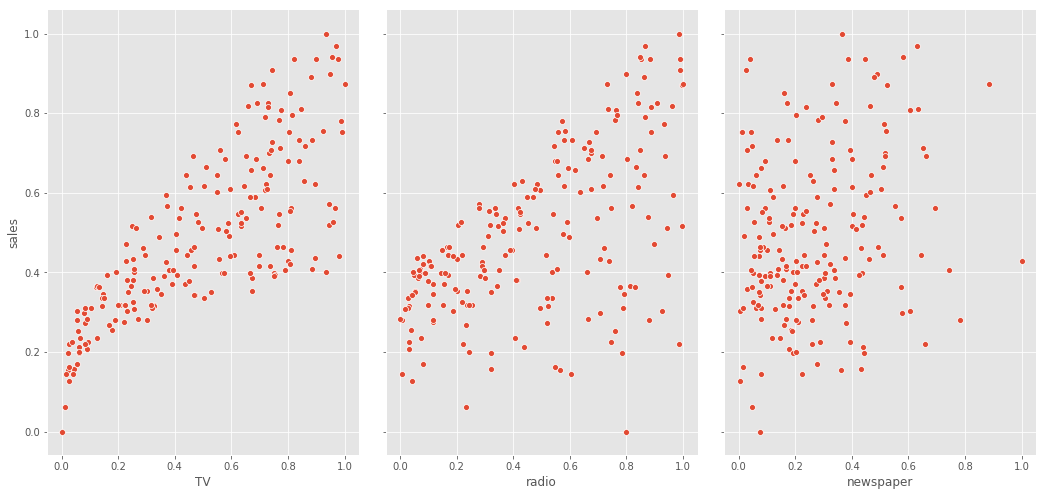

In [11]:
import seaborn as sns
sns.pairplot(df, x_vars=['TV','radio','newspaper'],y_vars=['sales'], height=7, aspect=0.7)

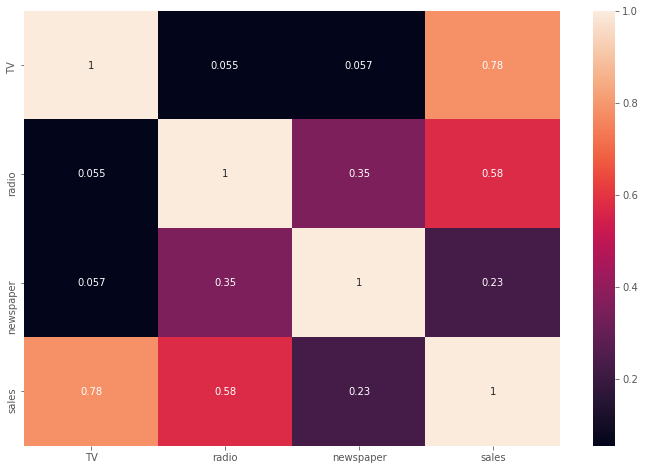

In [12]:
sns.heatmap(df.corr(),annot=True)

<p>By observing heatmap we can analyse that Tv,radio channels are key role in sales rather than newspaper</p>
<p style="color:blue">Lets see mathematically<p>

In [13]:
from sklearn.linear_model import LinearRegression 

In [14]:
# predictors
X = df[['TV','radio','newspaper']] 
#Target Variable
Y = df['sales']

In [15]:
lin_model1 = LinearRegression()
lin_model1.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
coefficients = list(zip(['TV','radio','newspaper'],lin_model1.coef_))
print("The coeff are ",coefficients)
print("The intercept is ",lin_model1.intercept_)

The coeff are  [('TV', 0.5327797504394116), ('radio', 0.36815310390326544), ('newspaper', -0.004644210981478526)]
The intercept is  0.053961156431710844


<p>From the above results we can see that <b>-ve coefficient of newspaper</b></p>

<h2>Feature Selection</h2>

In [17]:
from sklearn.metrics import r2_score

min_model2 = LinearRegression()
min_model2.fit(X[['TV',"radio"]],Y)
min_model2_pred = min_model2.predict(X[['TV','radio']])
print("Score without Newspaper feature: ",r2_score(Y,min_model2_pred))

Score without Newspaper feature:  0.8971942610828956


In [18]:
from sklearn.metrics import r2_score

min_model2 = LinearRegression()
min_model2.fit(X[['TV',"radio",'newspaper']],Y)
min_model2_pred = min_model2.predict(X[['TV','radio','newspaper']])
print("Score with Newspaper feature: ",r2_score(Y,min_model2_pred))

Score with Newspaper feature:  0.8972106381789522


<h2>Model Evaluation using Train/Test Split and Metrics</h2>

In [19]:
from sklearn.model_selection import train_test_split
import sklearn
X = df[['TV','radio','newspaper']]
Y = df['sales']

In [20]:
#splitting Data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 1)
print(len(X_train))

150


In [21]:
lin_model3 = LinearRegression().fit(X_train,Y_train)
lin_model3_pred = lin_model3.predict(X_test)

print("RMSE: ",np.sqrt(sklearn.metrics.mean_squared_error(Y_test, lin_model3_pred)))
print("R^2 Score: ",r2_score(Y_test,lin_model3_pred))


RMSE:  0.05530123712727928
R^2 Score:  0.9156213613792235


<p><b>Let's use train/test split with RMSE to see whether newspaper should be kept in the model or not</b></p>

In [22]:
X = df[['TV','radio']]
Y = df['sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 1)
lin_model4 = LinearRegression().fit(X_train,Y_train)
lin_model4_pred = lin_model4.predict(X_test)

print("RMSE: ",np.sqrt(sklearn.metrics.mean_squared_error(Y_test, lin_model4_pred)))
print("R^2 Score: ",r2_score(Y_test,lin_model4_pred))

RMSE:  0.05464186889520823
R^2 Score:  0.9176214942248907


<h2>Interaction Effect(Synergy)</h2>

In [24]:
df["Interaction"]=df['TV'] * df['radio']
X=df[['TV','radio','Interaction']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1)

In [25]:
lin_model5=LinearRegression().fit(X_train,Y_train)
lin_model5_pred=lin_model5.predict(X_test)
print("RMSE: ",np.sqrt(sklearn.metrics.mean_squared_error(Y_test,lin_model5_pred)))
print("R^2 Score: ",r2_score(Y_test,lin_model5_pred))

RMSE:  0.0276057918785997
R^2 Score:  0.9789736814681261


<b>Synergy effect has drastically reduced RMSE and increased r2 score, which implies that, funds are to be distributed among both TV and Radio for better Sales</b>